## K-Means

In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

### Visualizando um subconjunto dos dados

In [16]:
data = load_iris()

np.random.seed(10)

df = pd.DataFrame(
    np.hstack((
        data['data'], data['target'].reshape(data['target'].shape[0], 1)
    )), columns=data['feature_names'] + ['class']
)

inst = df.iloc[np.random.choice(df.index, size=10)]

display(data['target_names'])
display(inst)

x_axis = ['petal length (cm)', 'petal width (cm)']
y_axis = 'class'

X = inst[x_axis]
y = inst[y_axis]

n_instances, n_attributes = X.shape


array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
9,4.9,3.1,1.5,0.1,0.0
125,7.2,3.2,6.0,1.8,2.0
15,5.7,4.4,1.5,0.4,0.0
64,5.6,2.9,3.6,1.3,1.0
113,5.7,2.5,5.0,2.0,2.0
123,6.3,2.7,4.9,1.8,2.0
113,5.7,2.5,5.0,2.0,2.0
8,4.4,2.9,1.4,0.2,0.0
73,6.1,2.8,4.7,1.2,1.0
0,5.1,3.5,1.4,0.2,0.0


### Projetando os dados reais

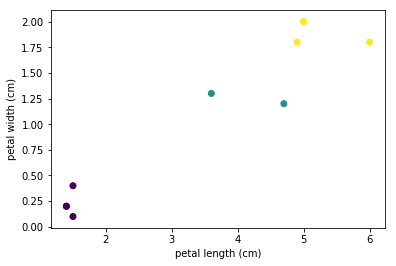

In [31]:
plt.scatter(X[x_axis[0]], X[x_axis[1]], c=y)
plt.xlabel(x_axis[0])
plt.ylabel(x_axis[1])
plt.show()

### Projetando com os centróides

Intervalos de valores:


,petal length (cm),petal width (cm)
min,1.4,0.1
max,6.0,2.0


centróides:


,petal length (cm),petal width (cm)
0,4.448337,1.039741
1,4.474348,1.358150
2,3.209553,0.410570


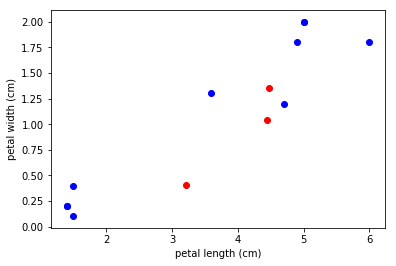

In [32]:
n_centroids = 3
n_attributes = len(x_axis)

np.random.seed(4)

ranges = pd.DataFrame(
    np.array([
        [min(X[x_axis[0]]), min(X[x_axis[1]])],
        [max(X[x_axis[0]]), max(X[x_axis[1]])]
    ]),
    index=['min', 'max'],
    columns=x_axis
)

print 'Intervalos de valores:'
display(ranges)

centroids = pd.DataFrame(
    np.random.random((n_centroids, n_attributes)),
    index=range(n_centroids),
    columns=x_axis
)

# desloca um pouco os centróides, pois a amostragem randômica é entre 0 e 1
centroids[x_axis[0]] *= ranges[x_axis[0]].loc['max'] - ranges[x_axis[0]].loc['min']
centroids[x_axis[1]] *= ranges[x_axis[1]].loc['max'] - ranges[x_axis[1]].loc['min']

print 'centróides:'
display(centroids)

plt.scatter(centroids[x_axis[0]], centroids[x_axis[1]], c='red')

plt.scatter(X[x_axis[0]], X[x_axis[1]], c='blue')  # utilizando azul para os dados de treino
plt.xlabel(x_axis[0])
plt.ylabel(x_axis[1])
plt.show()

In [33]:
def euclidean_distance(c, X):
    return np.sqrt(
        ((c - X) ** 2.).sum(axis=1)
    )

### Atribuição das instâncias ao centróide mais próximo

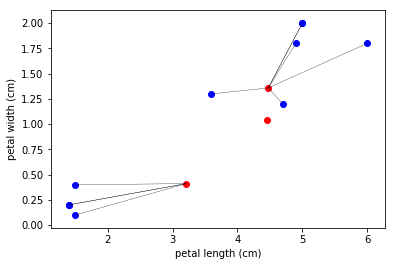

In [34]:
min_dist = np.zeros((n_instances), dtype=float) + np.inf
pred = np.zeros((n_instances), dtype=int)

for i, centroid in centroids.iterrows():
    dists = euclidean_distance(centroid.values, X.values)
    for j in range(n_instances):
        if min_dist[j] > dists[j]:
            min_dist[j] = dists[j]
            pred[j] = i

for j in range(n_instances):
    plt.plot(
        [X[x_axis[0]].iloc[j], centroids[x_axis[0]].iloc[pred[j]]],
        [X[x_axis[1]].iloc[j], centroids[x_axis[1]].iloc[pred[j]]],
        c='black',
        linewidth='0.3',
    )
      
plt.scatter(centroids[x_axis[0]], centroids[x_axis[1]], c='red')

plt.scatter(X[x_axis[0]], X[x_axis[1]], c='blue')  # utilizando azul para os dados de treino
plt.xlabel(x_axis[0])
plt.ylabel(x_axis[1])
plt.show()

### Reposicionamento dos centróides

novos centróides:


,petal length (cm),petal width (cm)
0,NaN,NaN
1,4.866667,1.683333
2,1.450000,0.225000


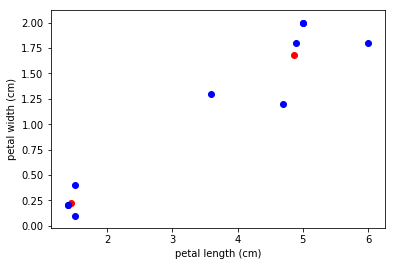

In [35]:
for i, centroid in centroids.iterrows():
    centroids.loc[i] = X[pred == i].sum(axis=0) / np.count_nonzero(pred == i)

print 'novos centróides:'
display(centroids)

plt.scatter(centroids[x_axis[0]], centroids[x_axis[1]], c='red')

plt.scatter(X[x_axis[0]], X[x_axis[1]], c='blue')  # utilizando azul para os dados de treino
plt.xlabel(x_axis[0])
plt.ylabel(x_axis[1])
plt.show()

### Calculando a largura da silhueta

In [36]:
from sklearn.metrics import silhouette_score

print 'SWC:', silhouette_score(X, pred)

SWC: 0.8006453534046084


### Comparando duas partições com a silhueta

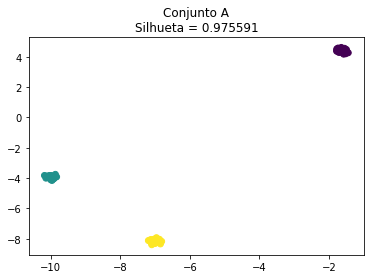

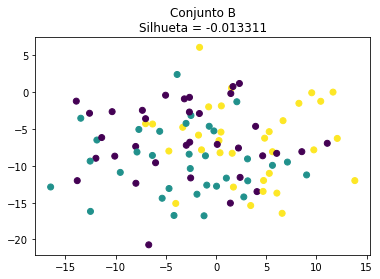

In [37]:
from sklearn.datasets import make_blobs

np.random.seed(1)

X_a, y_a = make_blobs(cluster_std=0.1)
X_b, y_b = make_blobs(cluster_std=5.5)

s_a = silhouette_score(X_a, y_a)
s_b = silhouette_score(X_b, y_b)

plt.figure()
plt.title('Conjunto A\nSilhueta = %f'% s_a)
plt.scatter(X_a[:, 0], X_a[:, 1], c=y_a)
plt.figure()
plt.title('Conjunto B\nSilhueta = %f' % s_b)
plt.scatter(X_b[:, 0], X_b[:, 1], c=y_b)
plt.show()

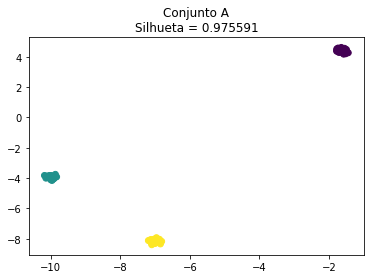

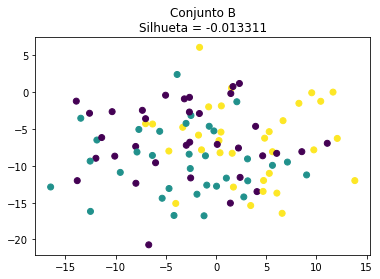

In [38]:
from sklearn.datasets import make_blobs

np.random.seed(1)

X_a, y_a = make_blobs(cluster_std=0.1)
X_b, y_b = make_blobs(cluster_std=5.5)

s_a = silhouette_score(X_a, y_a)
s_b = silhouette_score(X_b, y_b)

plt.figure()
plt.title('Conjunto A\nSilhueta = %f'% s_a)
plt.scatter(X_a[:, 0], X_a[:, 1], c=y_a)
plt.figure()
plt.title('Conjunto B\nSilhueta = %f' % s_b)
plt.scatter(X_b[:, 0], X_b[:, 1], c=y_b)
plt.show()

# Hierarquical algoritms

(150, 2)


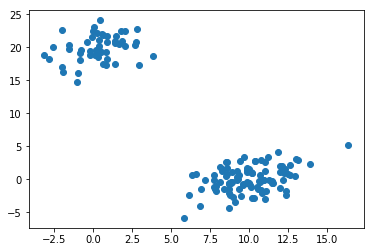

In [64]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [65]:
# generate the linkage matrix
Z = linkage(X, 'single')

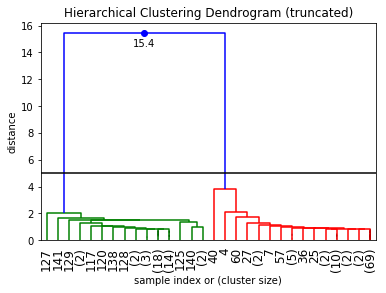

In [66]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

max_d = 5  # max_d as in max_distance

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [68]:
k=2
clusters = fcluster(Z, k, criterion='maxclust')

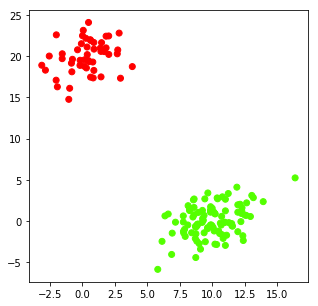

In [69]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

(10, 2)


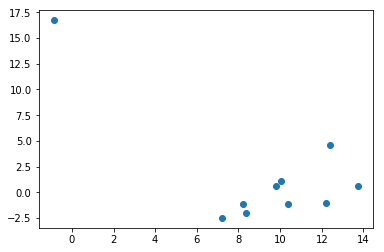

In [104]:
# generate two clusters: a with 9 points, b with 1:
np.random.seed(5)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[9,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[1,])
X = np.concatenate((a, b),)
print X.shape  # 10 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [184]:
# generate the linkage matrix
Z = linkage(X, 'single')

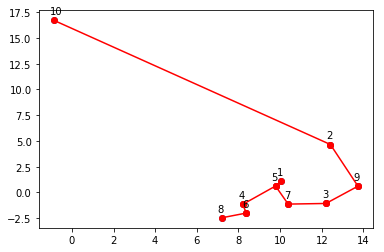

In [352]:
plt.scatter(X[:,0], X[:,1])  # plot all points
txt = [1,2,3,4,5,6,7,8,9,10]
for i, txt in enumerate(txt):
    plt.annotate(txt, (X[i][0]-0.2,X[i][1]+0.6))
plt.plot([X[0][0], X[4][0]], [X[0][1], X[4][1]], marker = 'o', color='r')
plt.plot([X[3][0], X[5][0]], [X[3][1], X[5][1]], marker = 'o', color='r')
plt.plot([X[7][0], X[5][0]], [X[7][1], X[5][1]], marker = 'o', color='r')
plt.plot([X[2][0], X[6][0]], [X[2][1], X[6][1]], marker = 'o', color='r')
plt.plot([X[4][0], X[6][0]], [X[4][1], X[6][1]], marker = 'o', color='r')
plt.plot([X[3][0], X[4][0]], [X[3][1], X[4][1]], marker = 'o', color='r')
plt.plot([X[8][0], X[2][0]], [X[8][1], X[2][1]], marker = 'o', color='r')
plt.plot([X[8][0], X[1][0]], [X[8][1], X[1][1]], marker = 'o', color='r')
plt.plot([X[9][0], X[1][0]], [X[9][1], X[1][1]], marker = 'o', color='r')

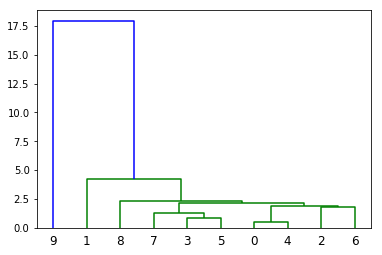

In [354]:
_ = dendrogram(Z)

In [46]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

data = load_iris()
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
)

# Exercicio

{'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='|S10'), 'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4

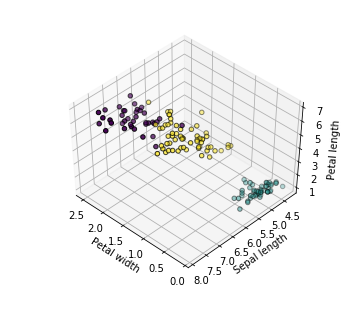

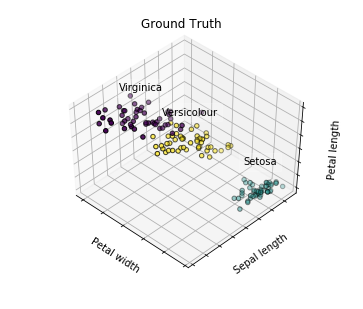

In [17]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

data = load_iris()
print data
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
)
y = data['target']

cl = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
cl = cl.fit(df)

labels = cl.labels_
centroids = cl.cluster_centers_
# print centroids
# print labels

fig = plt.figure(figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(df.iloc[:, 3].values, df.iloc[:, 0].values, df.iloc[:, 2].values, c=labels.astype(np.float), edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
# ax.set_title(titles[fignum - 1])
ax.dist = 12
# fignum = fignum + 1

fig = plt.figure(figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(df.iloc[y == label, 3].mean(),
              df.iloc[y == label, 0].mean(),
              df.iloc[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(df.iloc[:, 3].values, df.iloc[:, 0].values, df.iloc[:, 2].values, c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()



# Exercício extra

In [7]:
dataset = read_data('adult.data', nrows=None, header=None, index_col=None)
print dataset

NameError: name 'read_data' is not defined